#ARIMA: Autoregressive Integrated Moving Average
 It combines three key components:
 *  autoregression (AR)
 * differencing (I)
 *  moving average (MA).


## Autoregression (AR):
This part uses past values of the time series to predict its future values.

##Integrated (I):
This involves differencing the time series to make it stationary, meaning its statistical properties (like mean and variance) do not change over time.

##Moving Average (MA):
This part models the forecast errors as a linear combination of past errors.

ARIMA models are often represented as ARIMA(p, d, q), where:
* 'p' is the order of the autoregressive (AR) part (number of past values used).
* 'd' is the degree of differencing (number of times the data is differenced to make it stationary).
* 'q' is the order of the moving average (MA) part (number of past forecast errors used).

## ARIMA models are powerful tools for forecasting and understanding time series data, particularly in areas like finance, economics, and weather forecasting.

In time series analysis, stationary data refers to data where the statistical properties, like mean and variance, do not change over time. This is a crucial concept because many time series models and techniques assume stationarity for accurate forecasting and analysis. Non-stationary data, on the other hand, exhibits trends or seasonality, meaning its statistical properties vary with time

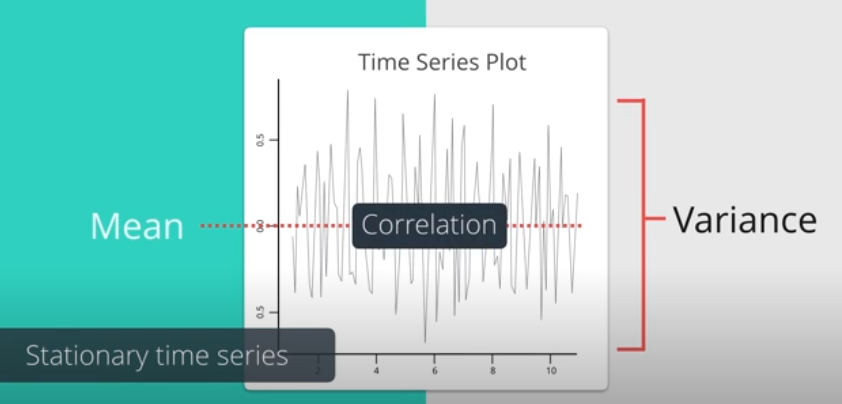

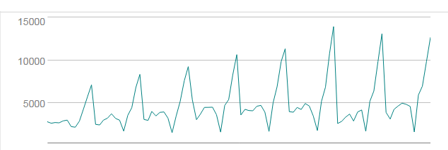

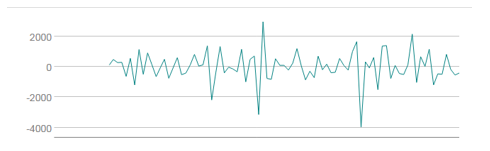

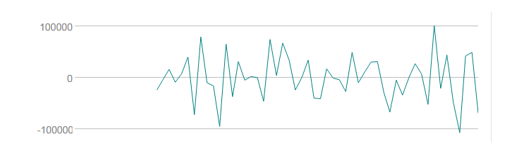

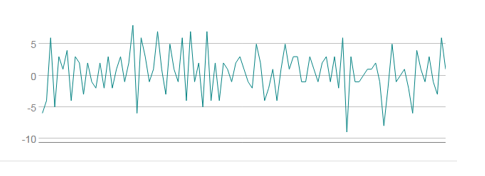

# Differencing
Differencing is a method of transforming a non-stationary time series to a stationary one. This is an important step in preparing data to be used in an ARIMA model. Let’s go through an example to understand differencing.

## Differencing Example
Imagine a toothbrush manufacturer is trying to predict demand in order to make decisions about production. As you’d imagine, toothbrush sales are not subject to much seasonality.


# *Look at Excel*

# An autocorrelation function (ACF)
plot visualizes the correlation between a time series and lagged versions of itself, helping to identify patterns and assess randomness. It's a key tool in time series analysis, used to understand how data points relate to their past values and to determine if a series is stationary.


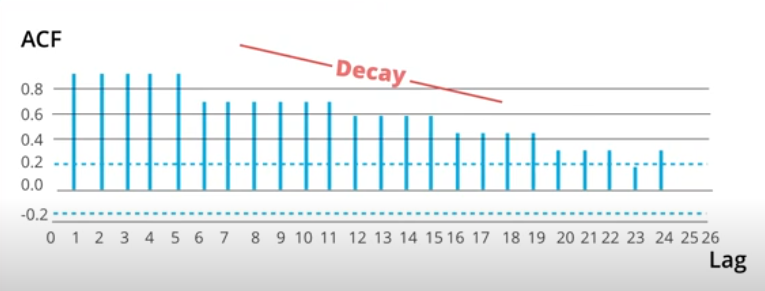

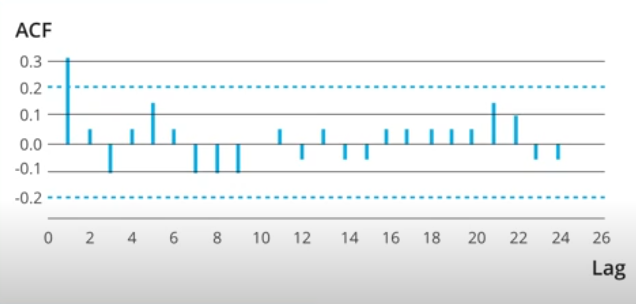

# ARIMA

In [ ]:
!pip install statsmodels pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 310.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 887.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.2 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.2

In [ ]:
!pip install numpy==1.26.4


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 659.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.1 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Excel file
df = pd.read_excel('/content/drive/MyDrive/bookings.csv.xlsx')

# Display first few rows
df.head()

,Year,Month,Bookings
0,2006,Jan,383
1,2006,Feb,366
2,2006,Mar,250
3,2006,Apr,318
4,2006,May,334


In [ ]:
# Step 2: Combine 'Year' and 'Month' into a datetime column
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'], format='%Y-%b')

# Step 3: Set datetime as index and sort
df.set_index('date', inplace=True)
df = df[['Bookings']].asfreq('MS')  # MS = Month Start

In [ ]:
df.head()

,Bookings
date,
2006-01-01,383
2006-02-01,366
2006-03-01,250
2006-04-01,318
2006-05-01,334


In [ ]:
# Auto-ARIMA to find best parameters
auto_model = auto_arima(df['Bookings'], seasonal=False, trace=True)
print(auto_model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2153.568, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2154.256, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2136.464, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2151.914, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2122.776, Time=0.86 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2112.658, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2154.274, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2083.476, Time=0.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2113.632, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2079.388, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2083.884, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2079.029, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2077.213, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2083.868, Time=0.10 sec

Best model:  ARIMA(5,1,0)(0,0,0)[0] intercept
Total fit time: 4.702 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1031.607
Date:                Mon, 11 Aug 2025   AIC                           2077.213
Time:                        00:36:26   BIC                           2096.667
Sample:                    01-01-2006   HQIC                          2085.113
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    414.7322    199.544      2.078      0.038      23.633 

In [ ]:
# Fit ARIMA with best parameters
model = ARIMA(df['Bookings'], order=auto_model.order)
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Bookings   No. Observations:                  120
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1035.934
Date:                Mon, 11 Aug 2025   AIC                           2083.868
Time:                        00:39:50   BIC                           2100.542
Sample:                    01-01-2006   HQIC                          2090.639
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5249      0.129     -4.079      0.000      -0.777      -0.273
ar.L2         -0.4048      0.113     -3.582      0.000      -0.626      -0.183
ar.L3         -0.6947      0.092     -7.521      0.0

In [ ]:
# Forecast
n_forecast = 12
forecast = model_fit.forecast(steps=12)

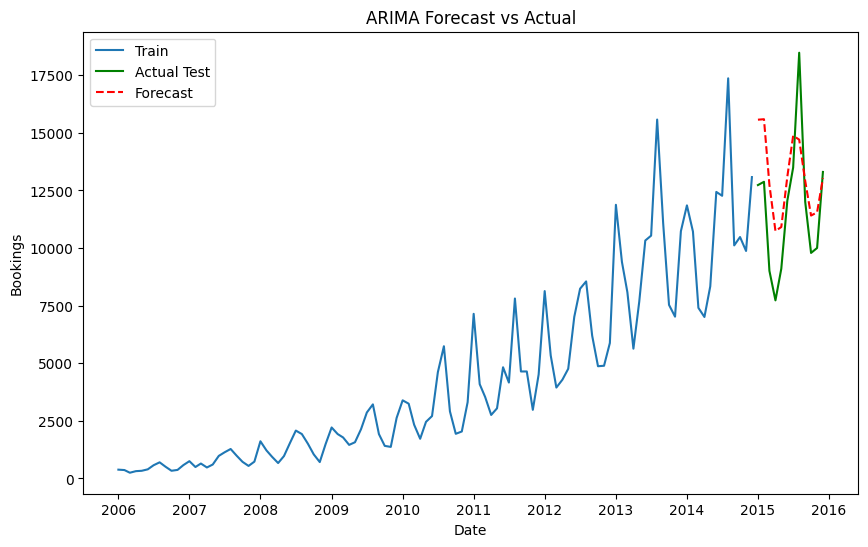

In [ ]:
# Plot actual vs forecast
plt.figure(figsize=(10,6))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index, test['Bookings'], label='Actual Test', color='green')
plt.plot(test.index, forecast, label='Forecast', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Bookings')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()


In [ ]:
# Evaluate (using last 12 points as test)
train = df.iloc[:-12]
test = df.iloc[-12:]
model = ARIMA(train['Bookings'], order=auto_model.order)
model_fit = model.fit()
pred = model_fit.forecast(steps=12)
rmse = np.sqrt(mean_squared_error(test, pred))
print(f"RMSE: {rmse}")

RMSE: 2171.2094237391043


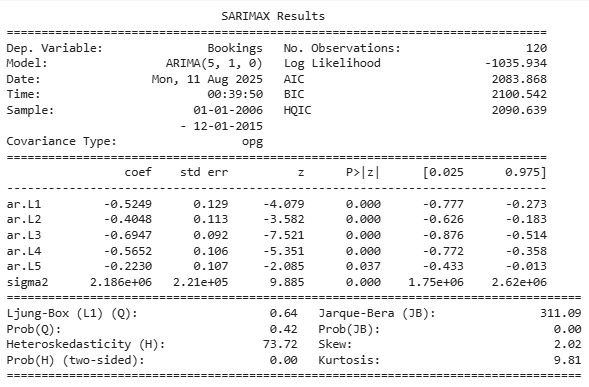

## Model: ARIMA(5, 1, 0)
* 5 = p → 5 AutoRegressive (AR) terms

* 1 = d → differenced once to remove trend

* 0 = q → no Moving Average (MA) terms

## No. Observations: 120

* You have 120 time points in the series.

## AIC/BIC/HQIC :

* AIC (Akaike Information Criterion) = 2083.868

* BIC (Bayesian Information Criterion) = 2100.542

* Lower values indicate a better model (useful when comparing models).


| Coef           | Meaning                            | Interpretation                                                                                                                                                         |
| -------------- | ---------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| ar.L1 to ar.L5 | AR terms for lags 1–5              | These numbers show how much each lag contributes to the forecast. Negative values mean that when the lag value goes up, the forecast goes down (inverse relationship). |
| sigma²         | Variance of the residuals (errors) | \~2.18e+06 means the average squared error size is large — in your case, it’s bookings².                                                                               |


## The P>|z| column is important:

* Values below 0.05 = statistically significant effect.

* Here, ar.L1 to ar.L5 all have p-values near 0.000 → they’re significant.

* ar.L5 has a p-value 0.037 → still significant but weaker than the others.


## Diagnostic Tests
* Ljung-Box (Q): Tests whether residuals are white noise.

* p-value = 0.42 → residuals are likely independent (good sign).

## Heteroskedasticity (H): Tests if variance of residuals changes over time.

* H = 73.72, p-value = 0.00 → strong evidence of changing variance over time (not ideal; you may need variance-stabilizing transformation like log).

## Jarque-Bera (JB): Tests normality of residuals.

* p-value = 0.00 → residuals are not normally distributed (common in real data, but can affect confidence intervals).
